In [23]:
import pandas as pd

# Load the dataset
file_path = '../dim-reduction/cardf_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,2,21,4.0,2.2,1,1,26,6,3,0,1993
1,1,19,2,22,4.0,2.2,1,1,27,6,3,1,1993
2,2,16,2,19,6.0,3.0,1,1,22,6,3,0,1993
3,3,16,2,18,6.0,3.0,1,1,22,6,3,1,1993
4,4,18,3,21,4.0,2.2,1,1,26,6,3,0,1993


In [24]:
# Compute the distribution of class labels in the dataset
class_distribution_cleaned = df['fuel_type'].value_counts(normalize=True)

class_distribution_cleaned


fuel_type
1    0.6875
0    0.3125
Name: proportion, dtype: float64

In [25]:
# Splitting the dataset into features (X) and target variable (y)
X_cleaned = df.drop('fuel_type', axis=1)
y_cleaned = df['fuel_type']

# Splitting the data into train and test sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(
    X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Generating random predictions based on class distribution
random_predictions_cleaned = np.random.choice(class_distribution_cleaned.index, 
                                              size=len(y_test_cleaned), 
                                              p=class_distribution_cleaned.values)

# Evaluating the baseline model
accuracy_baseline = accuracy_score(y_test_cleaned, random_predictions_cleaned)
precision_baseline = precision_score(y_test_cleaned, random_predictions_cleaned, pos_label=0)
recall_baseline = recall_score(y_test_cleaned, random_predictions_cleaned, pos_label=0)

accuracy_baseline, precision_baseline, recall_baseline

(0.5, 0.2, 0.2)

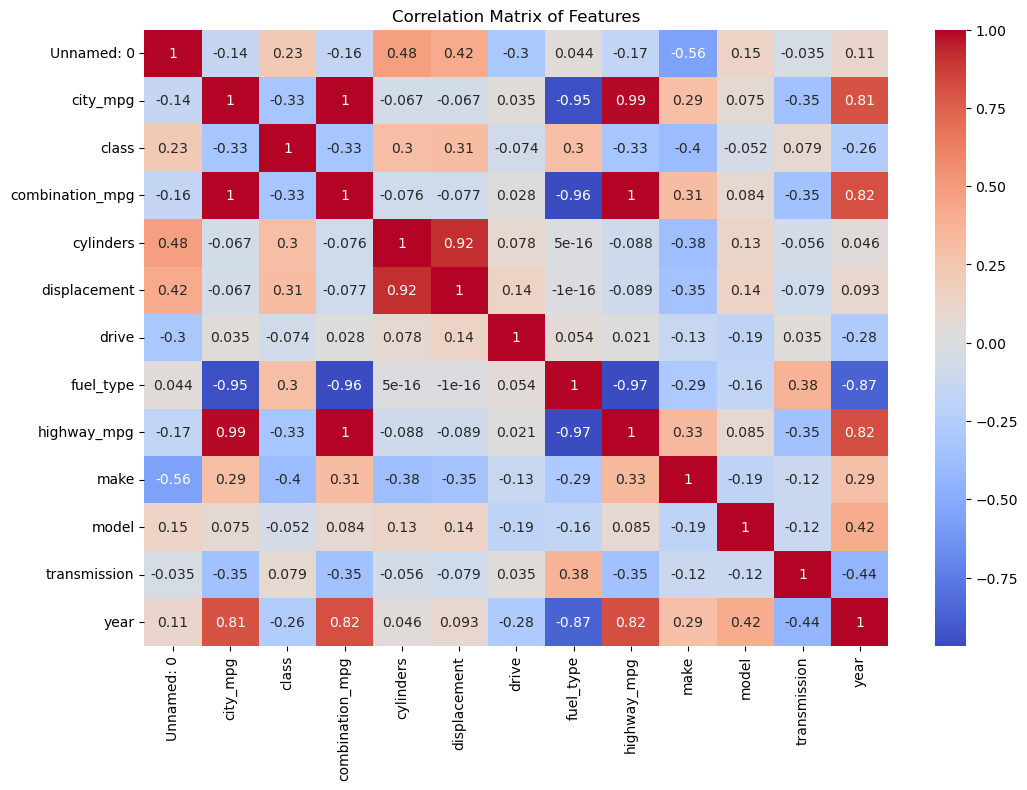

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()


In [27]:
# Feature importance from an initial Decision Tree model
from sklearn import tree

initial_dt = tree.DecisionTreeClassifier(random_state=42)
initial_dt.fit(X_train_cleaned, y_train_cleaned)
feature_importance = initial_dt.feature_importances_

# Displaying feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train_cleaned.columns, 'Importance': feature_importance})
feature_importance_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
7,highway_mpg,1.0
0,Unnamed: 0,0.0
1,city_mpg,0.0
2,class,0.0
3,combination_mpg,0.0
4,cylinders,0.0
5,displacement,0.0
6,drive,0.0
8,make,0.0
9,model,0.0


In [28]:
# Training the Decision Tree Classifier with the selected features
selected_features = ['highway_mpg', 'city_mpg', 'cylinders', 'displacement', 'year'] # Example feature selection
X_train_selected = X_train_cleaned[selected_features]
X_test_selected = X_test_cleaned[selected_features]

# Training the model
dt_classifier_selected = tree.DecisionTreeClassifier(random_state=42)
dt_classifier_selected.fit(X_train_selected, y_train_cleaned)

# Making predictions on the test set
y_pred_selected = dt_classifier_selected.predict(X_test_selected)

# Evaluating the model
accuracy_selected = accuracy_score(y_test_cleaned, y_pred_selected)
precision_selected = precision_score(y_test_cleaned, y_pred_selected, pos_label=0)
recall_selected = recall_score(y_test_cleaned, y_pred_selected, pos_label=0)
classification_report_selected = classification_report(y_test_cleaned, y_pred_selected)

accuracy_selected, precision_selected, recall_selected, classification_report_selected


NameError: name 'classification_report' is not defined

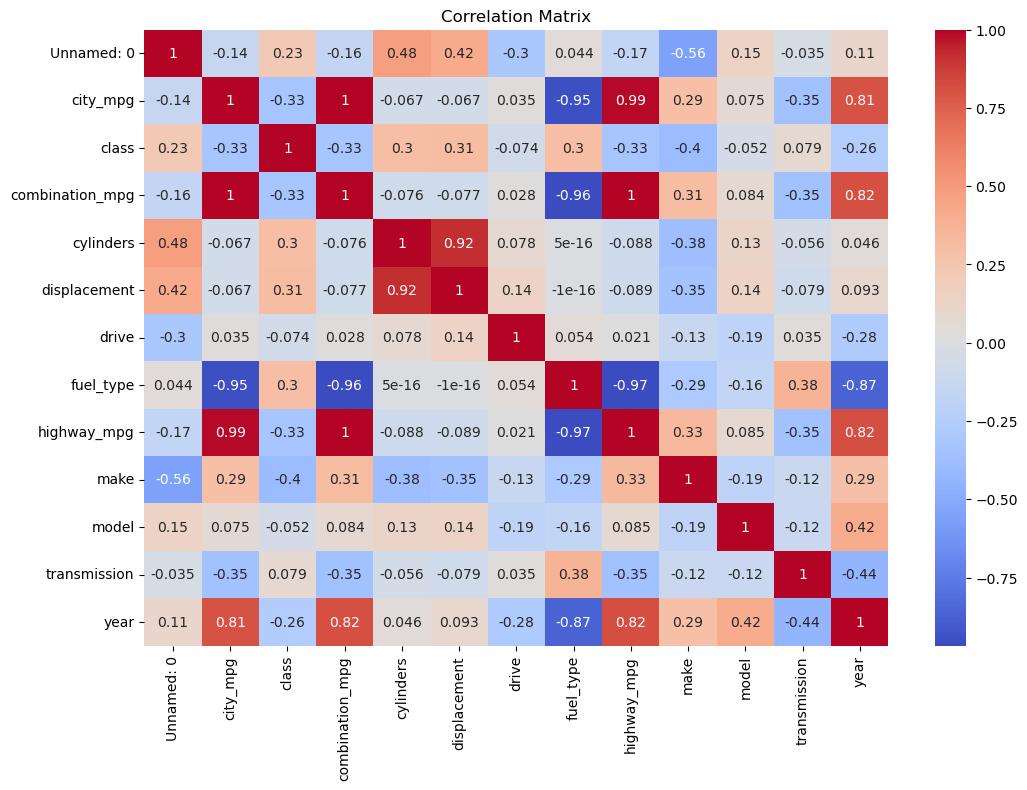

fuel_type          1.000000e+00
transmission       3.762708e-01
class              3.035188e-01
drive              5.381653e-02
Unnamed: 0         4.379399e-02
cylinders          4.957269e-16
displacement      -1.046619e-16
model             -1.608799e-01
make              -2.917321e-01
year              -8.662596e-01
city_mpg          -9.503344e-01
combination_mpg   -9.603270e-01
highway_mpg       -9.674366e-01
Name: fuel_type, dtype: float64

In [29]:
# Correlation analysis
correlation_matrix = df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Identifying features with the highest correlation to the target variable ('fuel_type')
correlation_with_target = correlation_matrix['fuel_type'].sort_values(ascending=False)

correlation_with_target

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Preparing the features and target variable
X = df.drop('fuel_type', axis=1)
y = df['fuel_type']

# Training a preliminary Decision Tree Classifier
dt_preliminary = DecisionTreeClassifier(random_state=42)
dt_preliminary.fit(X, y)

# Extracting feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_preliminary.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance

,Feature,Importance
7,highway_mpg,1.0
0,Unnamed: 0,0.0
1,city_mpg,0.0
2,class,0.0
3,combination_mpg,0.0
4,cylinders,0.0
5,displacement,0.0
6,drive,0.0
8,make,0.0
9,model,0.0


In [33]:
from sklearn.model_selection import GridSearchCV

# Selecting a subset of features based on the analysis
selected_features = ['highway_mpg', 'city_mpg', 'combination_mpg', 'year', 'make', 'model', 'class', 'transmission']

# Updating the feature set
X_selected = df[selected_features]

# Splitting the data into train and test sets
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    X_selected, y, test_size=0.2, random_state=42)

# Parameters for hyper-parameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
dt_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_selected, y_train_selected)

# Best parameters and best score
best_params = dt_grid_search.best_params_
best_score = dt_grid_search.best_score_

best_params, best_score

({'criterion': 'gini',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 1.0)